# How to make banner for social networks with Python

Somethimes whe want to make a banner to share something on the social networks. Banners are more likely to be "liked" and shared rather than sharing the link alone.
We can make a banner like this using software like Inkscape, GIMP, Office or other. We got 22 likes and 5 shares on Facebook.

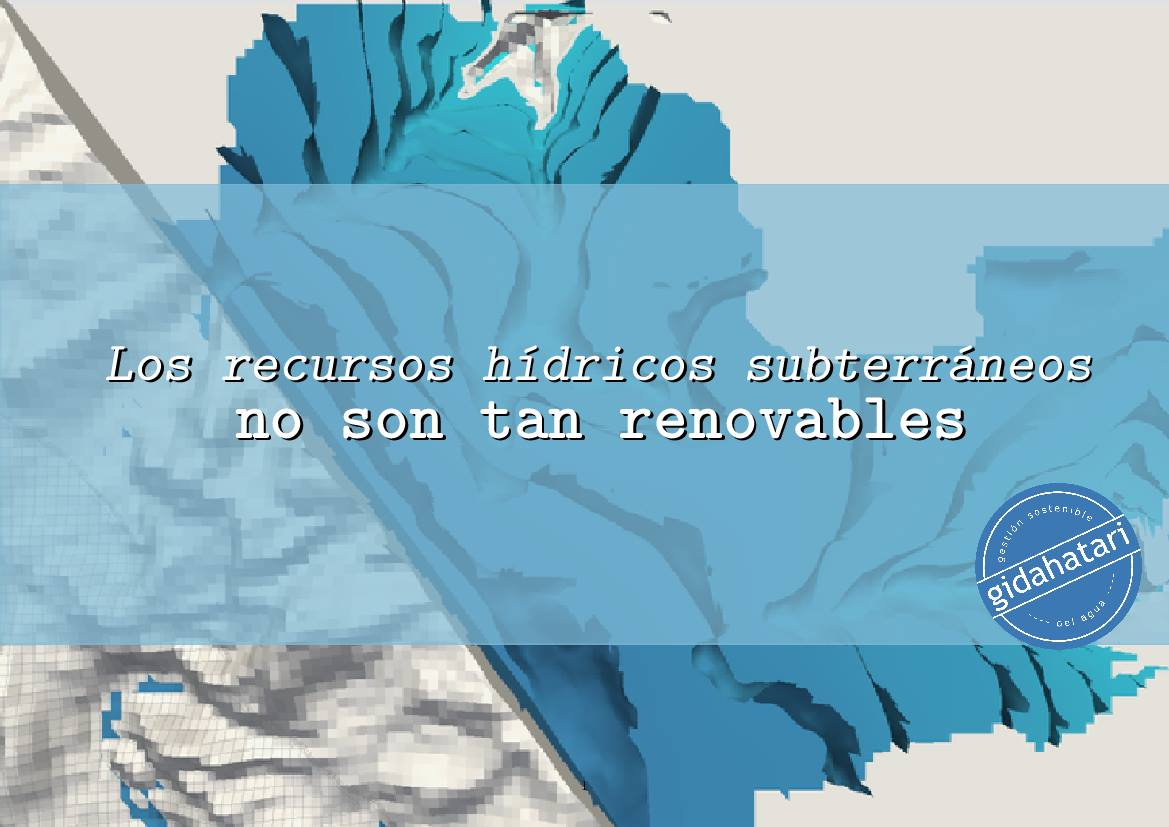

In [1]:
from IPython.display import Image
Image(filename='Png/Options/bannerexample.jpg')

However, in order to do a banner for every idea, new content or event will become very tedious. If you are not a wealthy startup or a part of a organization with graphic designers you are condemend to spend hours in becoming more success on the social networks.

## In the beginning, Python was not enough

We wanted to make the banner just with pure Python code by using matplotlib. We had some success at the begginning, but finally we crash on putting the logo on the canvas. It was quite frustating to spend hours of programming and then drop the code because is useless.
But we didnt gave up. The idea of having this tool was still of our interest and we came back to Python but with a little modification on the scope. That means that we were going to use Python to manage Latex.

## How does the Python - Latex code work

The code does basicly the following:
- Open the image
- Puts a background
- Set the phrase / text 
- Adds a logo
- Export as PDF
- Convert the PDF into JPG

In [2]:
# This is the list of packages we will need
%pylab inline
from PIL import Image
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow 

Populating the interactive namespace from numpy and matplotlib


In [3]:
#We define the function that set ups the backgroun
def BackgroundGenerator(imagen):
    #----------
    #Definimos poligono
    poligonotexto = Polygon([(0, 200), (1200, 200), (1200, 700), (0, 700)])
    polycolor = PolygonPatch(poligonotexto, color='#3F83B7',alpha=0.7)

    #----------
    #Definimos figura y subplot
    fig = plt.figure(figsize=(12,9), dpi=100)
    ax = fig.add_subplot(111)
    ax = fig.add_axes([0,0,1,1])
    ax.add_patch(polycolor)
    #----------
    #Definimos la imagen principal
    #quitamos el borde de la principal
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tick_params(
                    axis='both',
                    which='both',
                    bottom='off',
                    top='off',
                    right='off',
                    left='off',
                    labelleft='off',
                    labelbottom='off')

    ax.imshow(imagen)
    return fig

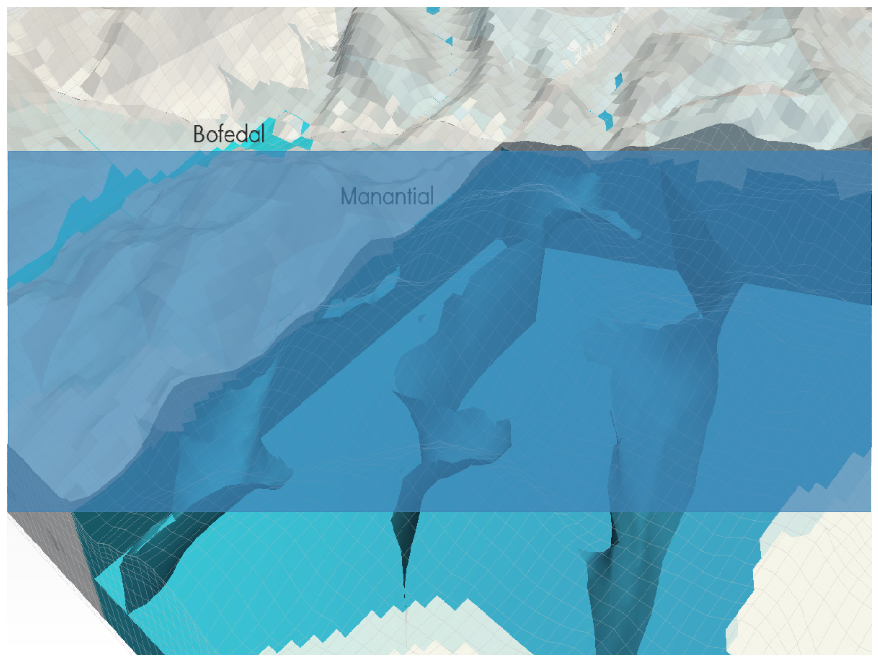

In [4]:
#the code also resizes the image to 1200 x 900 otherwise the banner aligment can be screwed
from PIL import Image
img = Image.open ('Png/Options/rawimage.png')
resize = img.resize((1200,900))
fig = BackgroundGenerator(resize)
fig.savefig('Png/Input/imagen.png')

In [5]:
#This code puts the text and logo on the figure
import re
import os

keywords = ['FRASE1','FRASE2', 'FRASE3', 'FRASE4','IMAGEN']
datos = ['Seminario 13 Febrero',
         'Modelamiento Numérico de Bofedales', 
         'y Manantiales y Evaluación del Impacto', 
         'de la Minería','gidahatari.png']

bannerentrada = open("Tex/HatariLabs_Lema.tex")
bannerentrada = bannerentrada.read()

bannersalida = open("Tex/HatariLabs_Lema_Salida.tex", "w")

for i in range(len(keywords)):
        bannerentrada = re.sub(keywords[i], datos[i], bannerentrada)

bannersalida.write(bannerentrada)
bannersalida.close()
        
os.system("pdflatex " + "-interaction=nonstopmode "+ 'Tex/HatariLabs_Lema_Salida.tex')

256

We have create a PDF of our banner. However, we can not share PDF as images on Facebook therefore we need a last code to convert the PDF to PNG

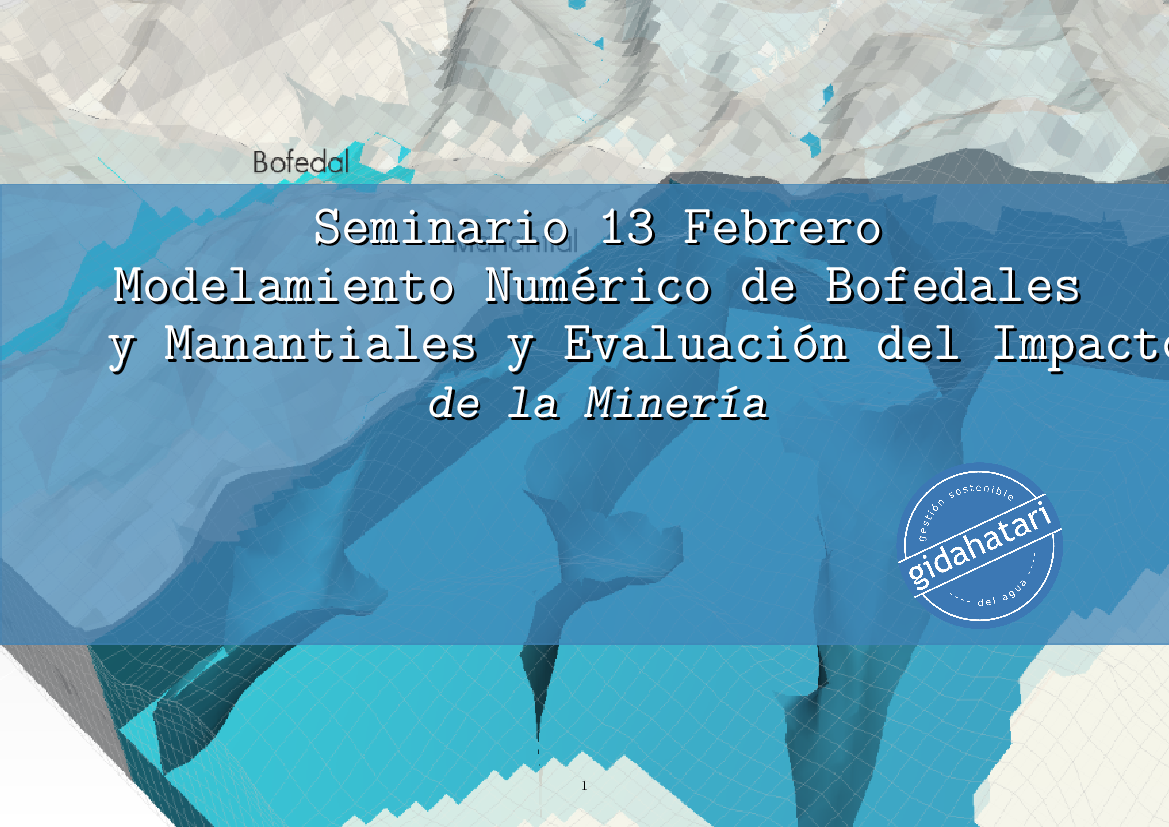

In [6]:
os.system("convert -density 100 -trim " + "HatariLabs_Lema_Salida.pdf " + '-quality 100 ' + 'Png/Output/HatariLabs.png')
from IPython.display import Image
Image(filename='Png/Output/HatariLabs.png') 